In [1]:
#######################Linear and nonlinear regression Closed-form, GD & SGD#########################
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-3,3,0.05)
X = X.reshape([np.size(X),1])
y = X*np.cos(X)

In [2]:
w_cl= np.matmul(np.linalg.inv(np.matmul(X.T,X)),np.matmul(X.T,y))
w_cl

array([[-0.55032547]])

In [3]:
# GD
w_gd = np.zeros(np.shape(X)[1])
w_gd = w_gd.reshape(np.shape(X)[1],1)
jj=0
alpha = 0.0001
while jj<100:
    w_gd = w_gd - alpha *np.matmul(X.T , (np.matmul(X,w_gd) - y))
    jj += 1
w_gd

array([[-0.53626183]])

In [4]:
# SGD
w_sgd = np.zeros(np.shape(X)[1])
jj=0
alpha = 0.02
while jj<80:
    for i in range(np.shape(X)[0]):
        w_sgd = w_sgd + alpha*X[i,:] * (y[i] - np.matmul(w_sgd.T,X[i,:]))
    jj += 1
w_sgd

array([-0.83763525])

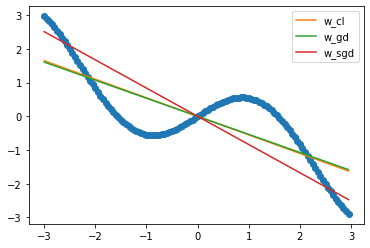

In [5]:
plt.plot(X,y,'o')
plt.plot(X,np.matmul(X,w_cl),label = "w_cl")
plt.plot(X,np.matmul(X,w_gd),label = "w_gd")
plt.plot(X,np.matmul(X,w_sgd),label = "w_sgd")


plt.legend(loc = "upper right")
plt.show()

In [6]:
#########################Feature Engineering#################################
num =10
l = np.random.choice(len(X),num)
l = X[l,:]
l = np.unique(l)
beta = 0.3
similarities = {}
for x in X[:,0]:
    for i in l:
        similarities[x,i] =  np.exp(-beta * np.abs(x-i)**2 )
new_x = np.array(list(similarities.values()))
new_x = new_x.reshape([np.shape(X)[0] , np.size(l)])

In [7]:
w_cl = np.matmul(np.linalg.inv(np.matmul(new_x.T,new_x)),np.matmul(new_x.T,y))
w_cl

array([[ 5.20344937e+00],
       [ 2.05916405e+00],
       [-2.28921700e+01],
       [ 5.33184033e+03],
       [-2.90960391e+04],
       [ 2.09327547e+05],
       [-2.97027172e+05],
       [ 1.11489496e+05],
       [-1.01006948e+01]])

In [8]:
# GD
w_gd = np.zeros(np.shape(new_x)[1])
w_gd = w_gd.reshape(np.shape(new_x)[1],1)
jj=0
alpha = 0.001
while True:
    old_w = w_gd
    w_gd = w_gd - alpha *np.matmul(new_x.T , (np.matmul(new_x,w_gd) - y))
    
    if np.linalg.norm(w_gd -old_w)<0.001:
        break
    elif jj>3000:
        break
    
    jj += 1
print("Converged to  w = ",w_gd," on iter: ",jj)


Converged to  w =  [[ 3.82848852]
 [-0.0332199 ]
 [-2.78059123]
 [-0.65133814]
 [ 0.12460363]
 [ 0.81300555]
 [ 0.96307139]
 [ 1.10233693]
 [-2.79105844]]  on iter:  899


In [9]:
# SGD
w_sgd = np.zeros(np.shape(new_x)[1])
jj=0
alpha = 0.005
while True:
    old_w = w_sgd
    for i in range(np.shape(new_x)[0]):
        w_sgd = w_sgd + alpha*new_x[i,:] * (y[i] - np.matmul(w_sgd.T,new_x[i,:]))
    
    if np.linalg.norm(w_sgd -old_w)<0.001:
        break
    elif jj>3000:
        break
    
    jj += 1
print("Converged to  w = ",w_sgd," on iter: ",jj)


Converged to  w =  [ 3.47312354  0.48122132 -2.73476228 -2.08868372 -0.52912346  1.21482728
  1.65941188  2.101419   -3.19222851]  on iter:  1598


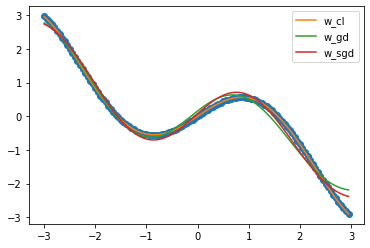

In [10]:
plt.plot(X,y,'o')
plt.plot(X,np.matmul(new_x,w_cl),label = "w_cl")
plt.plot(X,np.matmul(new_x,w_gd),label = "w_gd")
plt.plot(X,np.matmul(new_x,w_sgd),label = "w_sgd")


plt.legend(loc = "upper right")
plt.show()

In [49]:
############################ RBF sampler###########################
from sklearn.kernel_approximation import RBFSampler

rbf = RBFSampler()
X_train = np.arange(-3,3,0.05)
y_train = X_train*np.cos(X_train)
z = np.vstack((X_train,y_train))
z = z.T
rbf.fit(z)
phi_X = rbf.transform(z)

In [37]:
X_train = np.arange(-3,3,0.05)
y_train = X_train*np.cos(X_train)

In [39]:
z = np.vstack((X_train,y_train))

In [52]:
phi_X

array([[ 0.018497  , -0.00286822,  0.06506612, ..., -0.08047213,
        -0.07589827,  0.06085799],
       [ 0.0278576 , -0.02757435,  0.06642606, ..., -0.08180611,
        -0.08107748,  0.07619771],
       [ 0.03828338, -0.05258171,  0.06809844, ..., -0.08211027,
        -0.08719991,  0.09072778],
       ...,
       [-0.09519141,  0.09961753,  0.07220989, ...,  0.02254296,
        -0.1256173 ,  0.10466455],
       [-0.10362717,  0.11701072,  0.07412724, ...,  0.02332596,
        -0.12945972,  0.11615923],
       [-0.1106213 ,  0.12960836,  0.0757396 , ...,  0.02295776,
        -0.13233731,  0.12547319]])

In [42]:
z

array([[-3.00000000e+00,  2.96997749e+00],
       [-2.95000000e+00,  2.89602150e+00],
       [-2.90000000e+00,  2.81577868e+00],
       [-2.85000000e+00,  2.72969363e+00],
       [-2.80000000e+00,  2.63822255e+00],
       [-2.75000000e+00,  2.54183154e+00],
       [-2.70000000e+00,  2.44099478e+00],
       [-2.65000000e+00,  2.33619282e+00],
       [-2.60000000e+00,  2.22791076e+00],
       [-2.55000000e+00,  2.11663651e+00],
       [-2.50000000e+00,  2.00285904e+00],
       [-2.45000000e+00,  1.88706657e+00],
       [-2.40000000e+00,  1.76974492e+00],
       [-2.35000000e+00,  1.65137573e+00],
       [-2.30000000e+00,  1.53243485e+00],
       [-2.25000000e+00,  1.41339065e+00],
       [-2.20000000e+00,  1.29470246e+00],
       [-2.15000000e+00,  1.17681898e+00],
       [-2.10000000e+00,  1.06017682e+00],
       [-2.05000000e+00,  9.45199017e-01],
       [-2.00000000e+00,  8.32293673e-01],
       [-1.95000000e+00,  7.21852621e-01],
       [-1.90000000e+00,  6.14250177e-01],
       [-1.